# Random Forest Classifier

## 1. Definition

## 2. Libraries

In [26]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier

from sklearn.metrics import accuracy_score

from sklearn.metrics import confusion_matrix
import seaborn as sns

from sklearn.metrics import roc_auc_score, roc_curve, plot_roc_curve
from sklearn import metrics
import matplotlib.pyplot as plt 

from sklearn.metrics import classification_report

import pickle 

## 3. Load Data

In [27]:
loan = pd.read_csv('../data/BB.DD_MODELOS.csv')
loan.shape

(460541, 50)

In [28]:
loan.head()

,Unnamed: 0,loan_acceptance,"('acc_now_delinq',)","('acc_open_past_24mths',)","('all_util',)","('annual_inc',)","('avg_cur_bal',)","('bc_util',)","('collections_12_mths_ex_med',)","('delinq_2yrs',)",...,"('tax_liens',)","('tot_cur_bal',)","('total_acc',)","('total_bal_ex_mort',)","('total_bc_limit',)","('total_cu_tl',)","('total_rev_hi_lim',)","('MORTGAGE',)","('OWN',)","('RENT',)"
0,0,1,-0.070414,1.010683,-4.391856,1.169092,0.632931,-1.756350,-0.121123,-0.373769,...,-0.136687,1.966093,1.645054,1.082435,0.364780,3.872116,0.169542,-0.990665,2.932031,-0.817319
1,1,1,-0.070414,-0.889720,2.588767,-0.388652,-0.712121,1.344204,-0.121123,-0.373769,...,-0.136687,-0.865215,-1.644651,-0.937178,-0.813060,-1.373566,-0.787800,-0.990665,-0.341061,1.223512
2,2,1,-0.070414,2.594353,-3.840754,0.518772,0.083906,-1.236562,-0.121123,-0.373769,...,-0.136687,0.889188,0.082444,-0.081508,3.037755,3.872116,1.523901,1.009422,-0.341061,-0.817319
3,3,1,-0.070414,0.693949,-4.391856,-0.358722,-0.783204,-1.443750,-0.121123,-0.373769,...,-0.136687,-0.830447,-0.411012,-0.823391,-0.082319,-1.373566,-0.081056,-0.990665,-0.341061,1.223512
4,4,1,-0.070414,0.060482,3.690971,-0.010558,1.173048,1.020700,-0.121123,0.716465,...,-0.136687,-0.074671,-1.315681,-0.468803,-0.841905,-1.373566,-0.804695,1.009422,-0.341061,-0.817319


In [29]:
data = loan.iloc[:,1:]
data.shape

(460541, 49)

In [ ]:
X = data.drop(['loan_acceptance'], axis = 1).values
Y = data['loan_acceptance'].values

In [30]:
# We use the train_test_split function from SkLearn to split our dataset in two groups, the big one is to train the
# model and the 10% (in this case) to predict.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1) # Percentage of the test group.

## 4. Random Forest Model

The number within the Random Forest function indicates the number of trees. After many times running the code we decide put just 100 trees. It is pretty more faster and with similar accurancies.

In [31]:
%%time

estimator = RandomForestClassifier(100, 
                                  n_jobs = -2)

estimator.fit(X_train, Y_train)

CPU times: user 3min 24s, sys: 1.22 s, total: 3min 25s
Wall time: 1min 10s


RandomForestClassifier(n_jobs=-2)

In [35]:
# Predict
pred = estimator.predict(X_test)

# We just want to print the result to check if the output is correct (0 means deny, 1 accept).
print(pred)

[1 1 1 ... 1 1 1]


In [36]:
# Check its accuracy
accuracy_score(Y_test, pred) 

0.7579633047443274

The total accurary of the model is close to 76% which means that 3 out of 4 people are well predicted in our model.

### Confusion Matrix

In [40]:
confusion_matrix = confusion_matrix(Y_test, pred)
confusion_matrix = pd.DataFrame(confusion_matrix)

In [41]:
def conf_matrix(Y_test, pred):
    conf_plot = sns.heatmap(confusion_matrix, annot=True, cmap='Blues', fmt='g')
    bottom, top = conf_plot.get_ylim()
    conf_plot.set_ylim(bottom + 0.5, top - 0.5)
    conf_plot.set_ylabel('Predicted Label')
    conf_plot.set_xlabel('True Label');

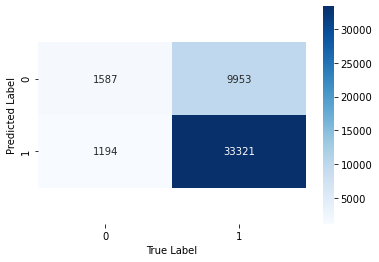

In [42]:
conf_matrix(Y_test, pred)

As we can see in this confusion matrix we predict the payers quite good. However, we have the same problem than with the other models. 
Nevertheless, in this model we have a better precision detecting the non-payers than with the SVM. 

The percentage of people who paid predicted is good, as we can observe between the two boxes of the right.


### ROC Curve

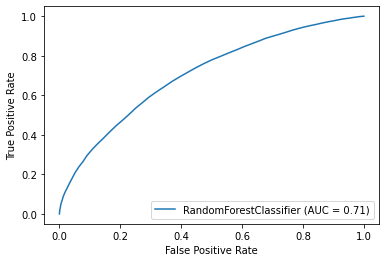

In [18]:
metrics.plot_roc_curve(estimator, X_test, Y_test)
plt.show()

### Model Statistics

In [39]:
print(classification_report(Y_test, pred))

              precision    recall  f1-score   support

           0       0.57      0.14      0.22     11540
           1       0.77      0.97      0.86     34515

    accuracy                           0.76     46055
   macro avg       0.67      0.55      0.54     46055
weighted avg       0.72      0.76      0.70     46055



The precision shows better results than before. The precision represent the corrected prediction for each value (o or 1), in the case of 0 (people who haven´t paid), the model pedict 55% of observations correctly, while in case of 1 (people who paid the loan) ascent to 77%.

The 0 values represent the 22% of the predcition dataset while the 1 values the 88%.

### Save the model

In [ ]:
model = estimator
filename = 'RandomForest.sav'
pickle.dump(model, open(filename, 'wb'))